# 37 - Visualizing Statistical Concepts

**Key Idea:** Pictures help us understand abstract ideas like uncertainty and spread.

**Analogy:** It's easier to see that a class is mostly tall if you line them up in height order than if you just read numbers.

**Common Visualization Types:**
- **Histograms:** Show data shapes (bell, skewed, bimodal)
- **Boxplots:** Show spread and outliers
- **PDFs/CDFs:** Show probability distributions
- **Confidence Intervals:** Shown as shaded bars or error bars

## Simple Example: Visualizing Class Heights

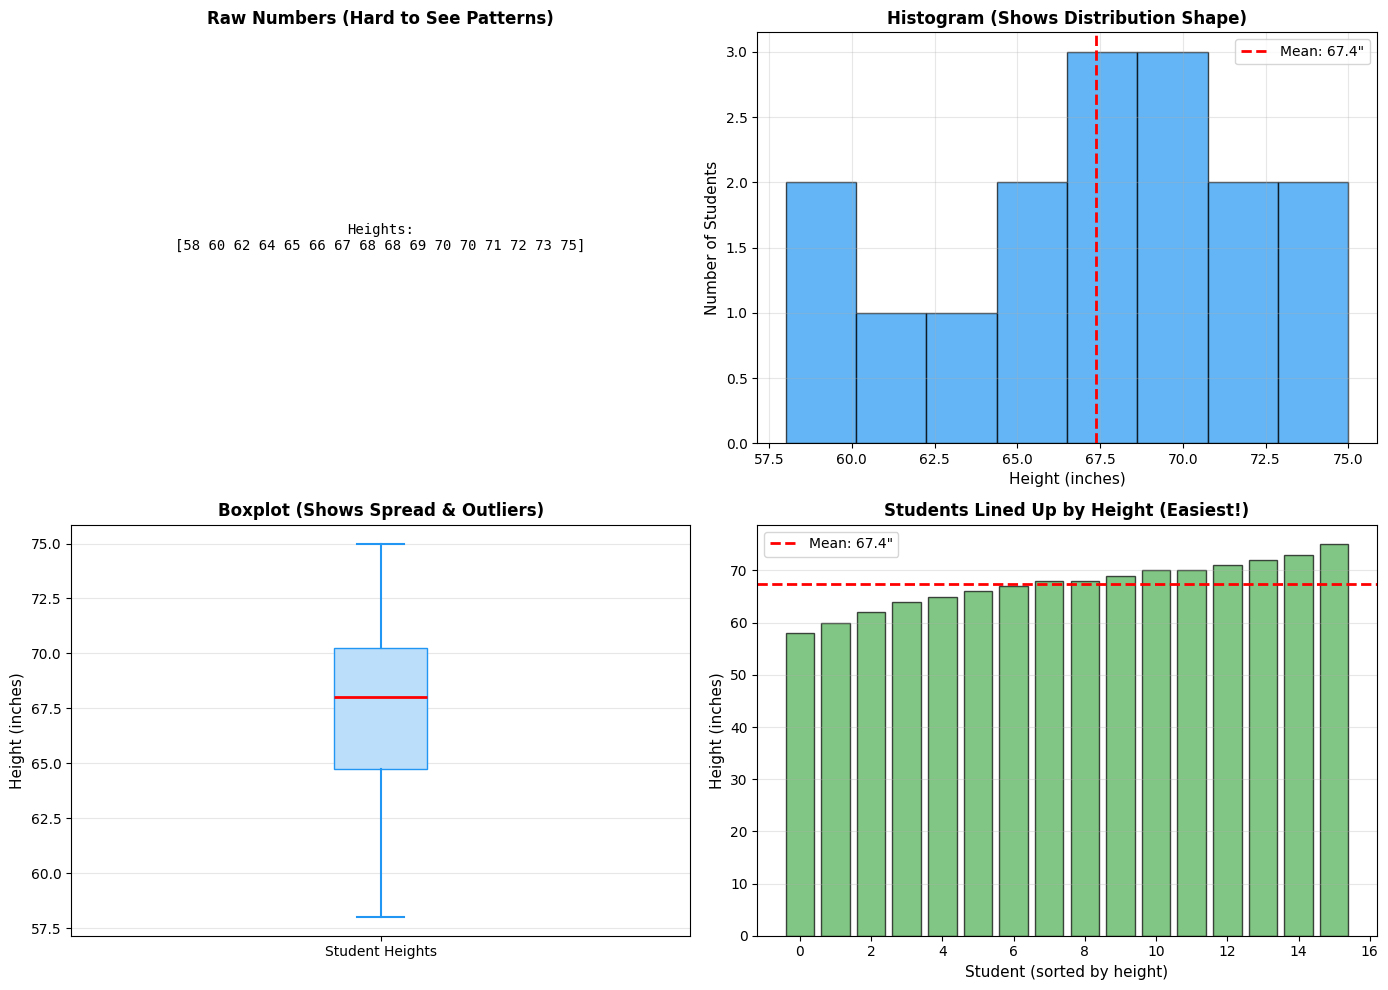


📏 Class Height Statistics:
   Mean: 67.4 inches
   Median: 68.0 inches
   Std Dev: 4.6 inches
   Range: 58 to 75 inches

→ Visual shows most students are 66-71 inches tall (much clearer than numbers!)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Class heights (in inches)
np.random.seed(42)
heights = np.array([58, 60, 62, 64, 65, 66, 67, 68, 68, 69, 70, 70, 71, 72, 73, 75])

# Calculate statistics
mean_height = np.mean(heights)
median_height = np.median(heights)
std_height = np.std(heights)

# Create visualization comparing different chart types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Raw Numbers (hard to interpret)
axes[0, 0].text(0.5, 0.5, f'Heights:\n{heights}', 
                ha='center', va='center', fontsize=10, family='monospace')
axes[0, 0].set_title('Raw Numbers (Hard to See Patterns)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# 2. Histogram (shows shape)
axes[0, 1].hist(heights, bins=8, color='#2196F3', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_height:.1f}"')
axes[0, 1].set_xlabel('Height (inches)', fontsize=11)
axes[0, 1].set_ylabel('Number of Students', fontsize=11)
axes[0, 1].set_title('Histogram (Shows Distribution Shape)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Boxplot (shows spread and outliers)
box = axes[1, 0].boxplot(heights, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='#BBDEFB', color='#2196F3'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='#2196F3', linewidth=1.5),
                         capprops=dict(color='#2196F3', linewidth=1.5))
axes[1, 0].set_ylabel('Height (inches)', fontsize=11)
axes[1, 0].set_title('Boxplot (Shows Spread & Outliers)', fontsize=12, fontweight='bold')
axes[1, 0].set_xticklabels(['Student Heights'])
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Line up by height (clearest visual)
sorted_heights = np.sort(heights)
axes[1, 1].bar(range(len(sorted_heights)), sorted_heights, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[1, 1].axhline(mean_height, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_height:.1f}"')
axes[1, 1].set_xlabel('Student (sorted by height)', fontsize=11)
axes[1, 1].set_ylabel('Height (inches)', fontsize=11)
axes[1, 1].set_title('Students Lined Up by Height (Easiest!)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📏 Class Height Statistics:")
print(f"   Mean: {mean_height:.1f} inches")
print(f"   Median: {median_height:.1f} inches")
print(f"   Std Dev: {std_height:.1f} inches")
print(f"   Range: {heights.min()} to {heights.max()} inches")
print(f"\n→ Visual shows most students are 66-71 inches tall (much clearer than numbers!)")

## Real-World Example: Marketing Conversion Rates with Confidence Bands

A marketing analyst shows conversion rates over time with confidence intervals. The graph makes the uncertainty clear — easier to trust than just numbers.

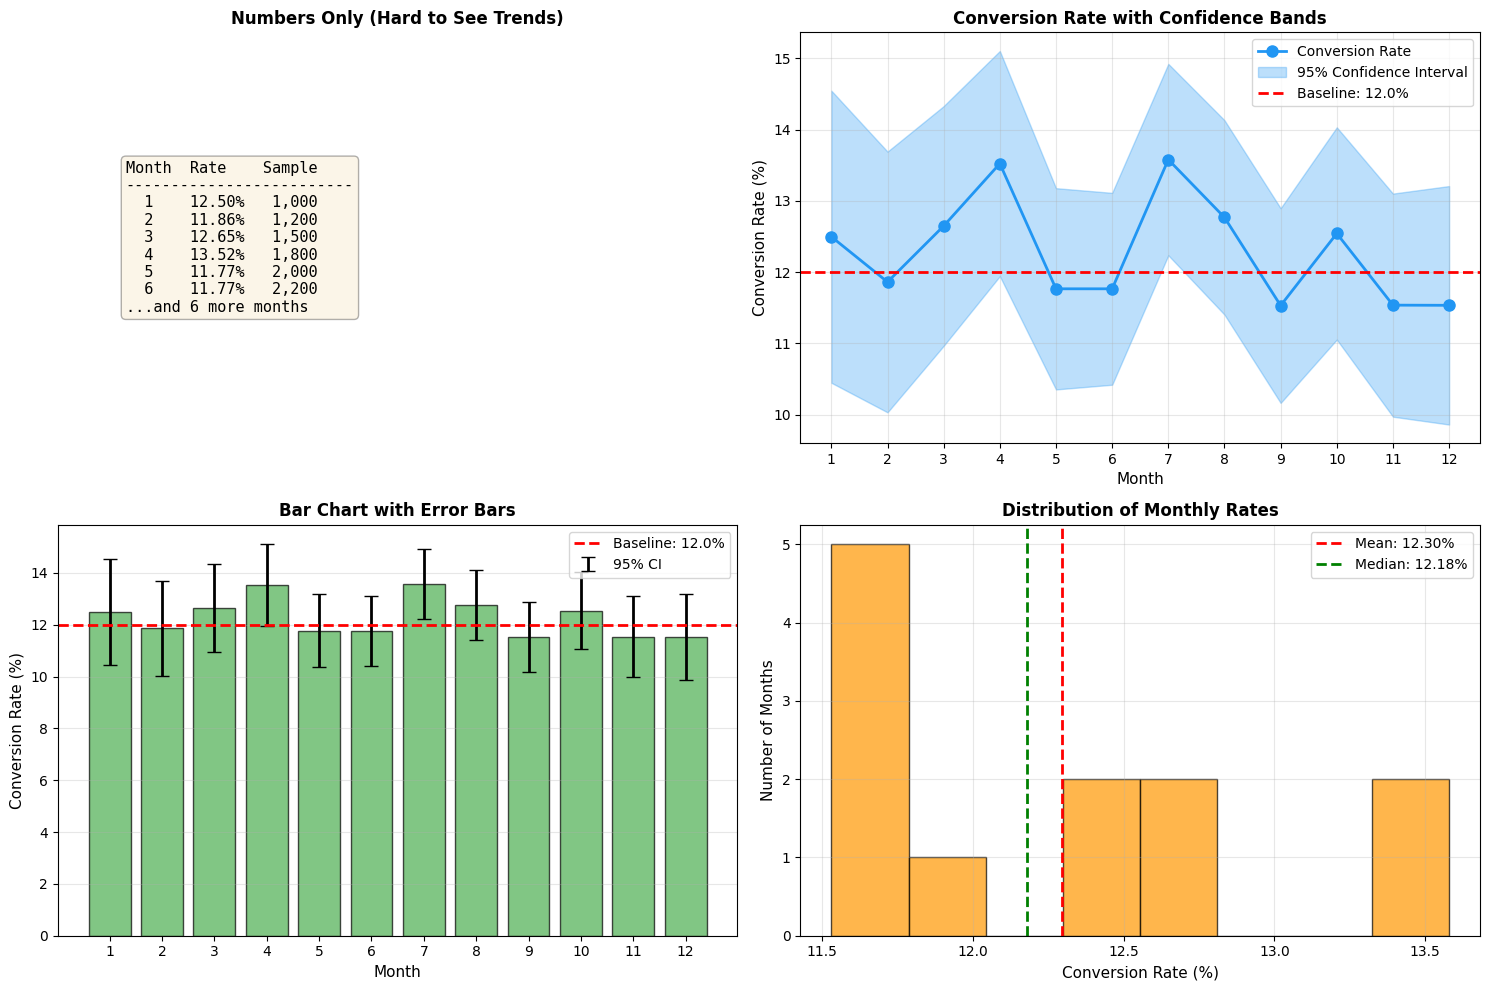


📊 Key Insights from Visualizations:
   Average Rate: 12.30%
   Range: 11.53% to 13.58%
   Std Dev: 0.71%

💡 What the Confidence Bands Tell Us:
   → Wider bands = more uncertainty (smaller sample size)
   → Narrower bands = more confidence (larger sample size)
   → Bands overlapping baseline = change not statistically significant

📈 Business Value:
   → Stakeholders see uncertainty visually, not just point estimates
   → Easier to spot months with genuine changes vs. random noise
   → Builds trust by showing honest uncertainty in the data

🎯 1 out of 12 months show statistically significant difference from baseline


In [2]:
# Simulate monthly conversion rate data
np.random.seed(42)
months = np.arange(1, 13)
true_rate = 0.12  # 12% baseline

# Sample sizes vary by month (more traffic in some months)
sample_sizes = np.array([1000, 1200, 1500, 1800, 2000, 2200, 2500, 2300, 2100, 1900, 1600, 1400])

# Simulate conversion rates with realistic variation
conversion_rates = true_rate + np.random.normal(0, 0.01, 12)
conversion_rates = np.clip(conversion_rates, 0.08, 0.16)  # Keep realistic

# Calculate 95% confidence intervals
# CI = rate ± 1.96 * sqrt(rate * (1-rate) / n)
std_errors = np.sqrt(conversion_rates * (1 - conversion_rates) / sample_sizes)
ci_lower = conversion_rates - 1.96 * std_errors
ci_upper = conversion_rates + 1.96 * std_errors

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Just numbers (table-like)
table_text = "Month  Rate    Sample\n" + "-" * 25 + "\n"
for i in range(6):  # Show first 6 months
    table_text += f"{i+1:3d}    {conversion_rates[i]:.2%}   {sample_sizes[i]:,}\n"
table_text += "...and 6 more months"
axes[0, 0].text(0.1, 0.5, table_text, 
                ha='left', va='center', fontsize=11, family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
axes[0, 0].set_title('Numbers Only (Hard to See Trends)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# 2. Line chart with confidence bands
axes[0, 1].plot(months, conversion_rates * 100, marker='o', color='#2196F3', 
                linewidth=2, markersize=8, label='Conversion Rate')
axes[0, 1].fill_between(months, ci_lower * 100, ci_upper * 100, 
                        alpha=0.3, color='#2196F3', label='95% Confidence Interval')
axes[0, 1].axhline(true_rate * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'Baseline: {true_rate:.1%}')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[0, 1].set_title('Conversion Rate with Confidence Bands', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(months)

# 3. Bar chart with error bars
axes[1, 0].bar(months, conversion_rates * 100, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[1, 0].errorbar(months, conversion_rates * 100, 
                    yerr=[conversion_rates * 100 - ci_lower * 100, 
                          ci_upper * 100 - conversion_rates * 100],
                    fmt='none', color='black', capsize=5, linewidth=2, label='95% CI')
axes[1, 0].axhline(true_rate * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'Baseline: {true_rate:.1%}')
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[1, 0].set_title('Bar Chart with Error Bars', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].set_xticks(months)

# 4. Distribution histogram of rates
axes[1, 1].hist(conversion_rates * 100, bins=8, color='#FF9800', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(np.mean(conversion_rates) * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {np.mean(conversion_rates):.2%}')
axes[1, 1].axvline(np.median(conversion_rates) * 100, color='green', linestyle='--', 
                   linewidth=2, label=f'Median: {np.median(conversion_rates):.2%}')
axes[1, 1].set_xlabel('Conversion Rate (%)', fontsize=11)
axes[1, 1].set_ylabel('Number of Months', fontsize=11)
axes[1, 1].set_title('Distribution of Monthly Rates', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Insights from Visualizations:")
print(f"   Average Rate: {np.mean(conversion_rates):.2%}")
print(f"   Range: {conversion_rates.min():.2%} to {conversion_rates.max():.2%}")
print(f"   Std Dev: {np.std(conversion_rates):.2%}")

print("\n💡 What the Confidence Bands Tell Us:")
print("   → Wider bands = more uncertainty (smaller sample size)")
print("   → Narrower bands = more confidence (larger sample size)")
print("   → Bands overlapping baseline = change not statistically significant")

print("\n📈 Business Value:")
print("   → Stakeholders see uncertainty visually, not just point estimates")
print("   → Easier to spot months with genuine changes vs. random noise")
print("   → Builds trust by showing honest uncertainty in the data")

# Count months where CI doesn't include baseline
significant_months = np.sum((ci_upper < true_rate) | (ci_lower > true_rate))
print(f"\n🎯 {significant_months} out of 12 months show statistically significant difference from baseline")

## Summary: Why Visualization Matters

### Visual Communication Benefits
1. **Pattern Recognition:** Humans spot trends faster in pictures than numbers
2. **Uncertainty Clarity:** Confidence bands make uncertainty tangible
3. **Outlier Detection:** Boxplots instantly show unusual values
4. **Distribution Shape:** Histograms reveal skewness, bimodality, gaps

### Common Chart Types for Statistics

| Chart Type | Best For | Shows |
|------------|----------|-------|
| **Histogram** | Distribution shape | Bell curve, skewness, gaps |
| **Boxplot** | Spread & outliers | Quartiles, range, unusual values |
| **Line + CI bands** | Trends with uncertainty | Change over time + confidence |
| **Bar + Error bars** | Comparing groups | Differences with uncertainty |
| **Scatter plot** | Relationships | Correlation, patterns, clusters |

### Real-World Applications
- **A/B Testing:** Show conversion rates with confidence intervals
- **Quality Control:** Use control charts to spot process changes
- **Finance:** Show stock returns with volatility bands
- **Healthcare:** Display patient outcomes with error bars

**Pro tip:** Always include uncertainty visualization (error bars, confidence bands) to be honest about data limitations!